# Spectral Extraction

In [1]:
from splintegrate import splintegrate
from tshirt.pipeline import spec_pipeline

from astropy.io import fits, ascii
import sys
import os
import glob
import numpy as np
import warnings
import yaml

<div class='alert alert-info'>
    <font size='3'><b>These cells contain instructions. Edit the paths below.</b></font>
</div>

In [2]:
spec2d_paths = 'ex_proc_data/*rateints.fits' ## path to segments of 2D calibrated data
split_dir = 'splintegrated_data' ## path to where the data should be split into individual integrations

Split up the individual integrations

In [3]:
segment_list = glob.glob(spec2d_paths)
for one_file in segment_list:
    splint = splintegrate.splint(inFile=one_file,outDir=split_dir)
    splint.split()

100%|██████████| 7/7 [00:00<00:00, 162.99it/s]

Found splintegrated_data/jw00042001001_01101_00002-seg021_nrca5_rateints_I01280.fits. Not overwriting
Found splintegrated_data/jw00042001001_01101_00002-seg021_nrca5_rateints_I01281.fits. Not overwriting
Found splintegrated_data/jw00042001001_01101_00002-seg021_nrca5_rateints_I01282.fits. Not overwriting
Found splintegrated_data/jw00042001001_01101_00002-seg021_nrca5_rateints_I01283.fits. Not overwriting
Found splintegrated_data/jw00042001001_01101_00002-seg021_nrca5_rateints_I01284.fits. Not overwriting
Found splintegrated_data/jw00042001001_01101_00002-seg021_nrca5_rateints_I01285.fits. Not overwriting
Found splintegrated_data/jw00042001001_01101_00002-seg021_nrca5_rateints_I01286.fits. Not overwriting


<div class='alert alert-info'>
    <font size='3'><b>Modify extraction parameters, if needed.</b></font>
</div>

In [4]:
with open('default_nc_grism_params.yaml') as fparam:
    t_params = yaml.safe_load(fparam)
t_params['procFiles'] = os.path.join(split_dir,'*.fits')
#t_params['starPositions'] = [33]
#t_params['bkgRegionsX'] = [[5, 250], [2020, 2044]]
#t_params['bkgRegionsY'] = [[5, 16], [48, 64]]
#t_params['apWidth'] = 10.0

In [5]:
spec = spec_pipeline.spec(directParam=t_params)


Check the aperture

/Users/everettschlawin/es_programs/tshirt/tshirt/pipeline/spec_pipeline.py:2178: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


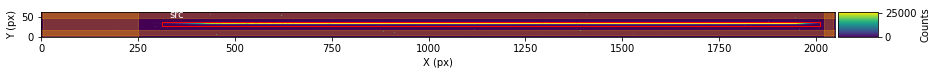

In [6]:
spec.showStarChoices(showPlot=True,figSize=(15,5))

<div class='alert alert-info'>
    <font size='3'><b>Check if the source and background apertures are correct. If not, modify above.</b></font>
</div>

Extract the spectra

In [7]:
spec.do_extraction(useMultiprocessing=True)

/Users/everettschlawin/es_programs/tshirt/tshirt/pipeline/utils.py:94: UserWarning: Less than 1points accepted, returning flat line
  warnings.warn(warntext)
100%|██████████| 7/7 [00:07<00:00,  1.10s/it]


Check the spectrum to see if it makes sense

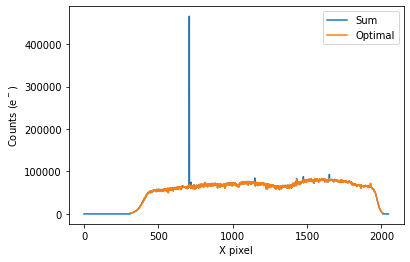

In [8]:
spec.plot_one_spec()

Plot the dynamic spectrum to see the transit

/Users/everettschlawin/es_programs/tshirt/tshirt/pipeline/spec_pipeline.py:1474: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


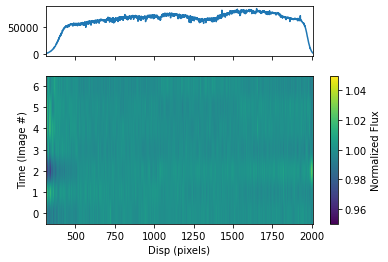

In [9]:
spec.plot_dynamic_spec(showPlot=True)

Plot the noise spectrum to compare measured noise and theoretical noise before wavelength binning

/Users/everettschlawin/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/everettschlawin/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/everettschlawin/es_programs/tshirt/tshirt/pipeline/spec_pipeline.py:1507: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


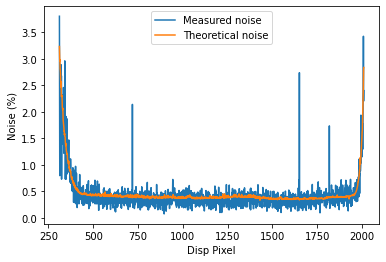

In [65]:
spec.plot_noise_spectrum()

Plot the time series

/Users/everettschlawin/es_programs/tshirt/tshirt/pipeline/spec_pipeline.py:1890: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


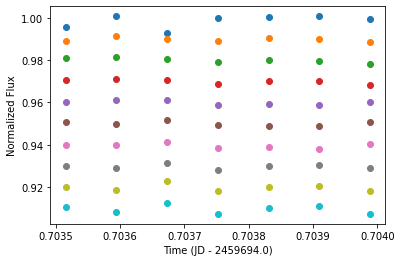

In [58]:
spec.plot_wavebin_series(showPlot=True,offset=0.01)